### rasterizing raster plots

- original code for making raster plots from https://gist.github.com/kylerbrown/5530238
- save to SVG with dpi=600 for publication quality figures
- scrub the SVG to make editing easier in Inkscape  
    - e.g. no need for deep ungroup and all labels are individual graphic elements  
    
- scour repository: https://github.com/scour-project/scour  
- docs: https://github.com/scour-project/scour/wiki/Documentation  
- install using conda: conda install -c conda-forge scour  

_if interested, scour can be used directly in a notebook following guidance here:_  
 https://stackoverflow.com/questions/50891715/run-python-scour-svg-optimizer-from-script-in-stead-of-the-cli

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def raster(event_times_list, color='k'):
    """
    Creates a raster plot **with spikes saved at 300 dpi as raster art**
    
    Original code from https://gist.github.com/kylerbrown/5530238

    Parameters
    ----------
    event_times_list : iterable
                       a list of event time iterables
    color : string
            color of vlines

    Returns
    -------
    ax : an axis containing the raster plot
    
    This version attempts to rasterize the plot
    Reference: https://matplotlib.org/stable/gallery/misc/rasterization_demo.html
    """
    ax = plt.gca()
    for ith, trial in enumerate(event_times_list):
        plt.vlines(trial, ith + .5, ith + 1.5, color=color, rasterized=True)
    plt.ylim(.5, len(event_times_list) + .5)
    return ax

In [3]:
def scourfig(file):
    # simple function to call the scour library to simplify SVGs made with matplotlib  
    # using "maximum scrubbing" as described in the project's github repo
    os.system('cp '+file+' temp.svg')
    os.system('scour -i temp.svg -o '+file+' --enable-viewboxing --enable-id-stripping \
        --enable-comment-stripping --shorten-ids --indent=none')
    os.remove('temp.svg')

**MG01_10202022-chan24_centerPokes_PEHmat**

The data are from a visually guided choice task (Swanson, White, et al., 2021; https://www.eneuro.org/content/8/3/ENEURO.0563-20.2021).  

Rats nosepoke into a center port to produce visual stimuli from two laterally adjacent choice ports and collect liquid sucrose rewards from a port on the opposite wall of the behavioral chamber.  

Neural activity was recorded using arrays of microwire electrodes and Open Ephys recording system. The data rate for the spikes was 30kHz.  

This single unit fired selectively during left responses, as the rat entered the left choice port and during travel to the reward port.  

A PDF file showing the neuron's activity broken out by response location and sorted by choice latency is included in this repository. The plots show spike rasters and spike density functions for trials with left and right responses.  

These data were collected by Samantha White in the Laubach Lab as part of her dissertation research and will be reported in a forthcoming manuscript.

In [4]:
cd data

/home/mark/Desktop/scour and rasters/data


In [5]:
Behavior = pd.read_csv('MG01_10202022_trialinfo.csv', index_col=0)

Latency = np.asarray(Behavior[Behavior.Valid==1].RespLat)

PEH = np.load('MG01_10202022-chan24_centerPokes_PEHmat.npy')
SDF = np.load('MG01_10202022-chan24_centerPokes_SDFmat.npy')

Scour processed file "temp.svg" in 112 ms: 136892/158404 bytes new/orig -> 86.4%


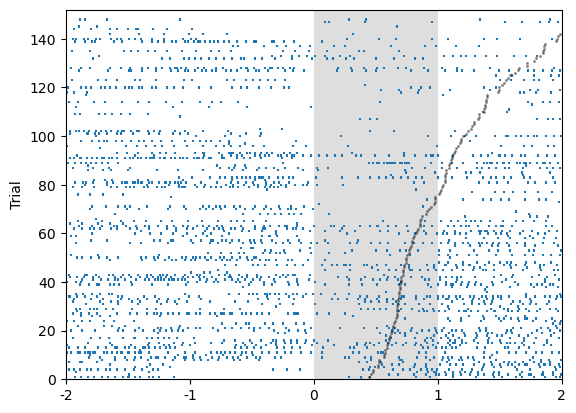

In [6]:
# collect spikes for plot
spk = []
for i in np.argsort(Latency):
    spk.append(np.nonzero(PEH[Behavior.Valid==1][i,:]))
    
# raster plot
raster(spk, color="tab:blue")
trials = PEH[(Behavior.Valid==1)].shape[0]
plt.axis((0,120000,0,trials))
plt.ylabel('Trial')
plt.xticks((0,30000,60000,90000,120000), labels=('-2','-1','0','1','2'))

# add shading for data window for GLM analysis
# ===this element must also be set with zorder=-11 (1 less than the spike rasters)
#     or else the shading is on top of the raster===
plt.axvspan(60001, 90000, 0, trials, facecolor='0.75', alpha=0.5, zorder=-1)

# add symbols for choice port entries
SidePortEntry = np.sort(Latency * 30000 + 60000)
for tr,ti in enumerate(SidePortEntry):
    plt.plot(ti, tr, linestyle=None, marker='o', markersize=2, alpha=0.5,
            markeredgewidth=0.0, markerfacecolor='k')
    
# save plot to SVG file, with dpi=600 for the spike rasters
plt.savefig('raster_demo.svg', dpi=600)

# scrub the SVG using the scour library
scourfig('raster_demo.svg')